# 모두를 위한 딥러닝 : Pytorch
## Lecture 2 - Linear Regression
본 문서는 모두를 위한 딥러닝 강의를 듣고 공부 목적으로 작성되었습니다.

### Theoretical Overview
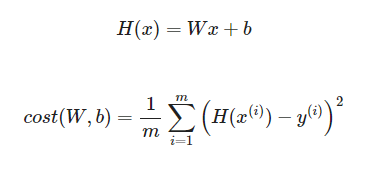
* Cost를 최소화하는 것을 목표로 학습이 진행된다

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [22]:
torch.manual_seed(1)

### Data

In [23]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

### Weight Initialization
처음의 weight를 0으로 초기화한다.

In [35]:
W = torch.zeros(1, requires_grad=True)
print(W)
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)


### Hypothesis

In [36]:
H = x_train * W + b
print(H)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


### Cost

In [37]:
print(y_train - H)

tensor([[1.],
        [2.],
        [3.]], grad_fn=<SubBackward0>)


In [38]:
cost = torch.mean((y_train-H)**2)

In [39]:
print(cost)

tensor(4.6667, grad_fn=<MeanBackward0>)


### Gradient Descent

In [40]:
optimizer = optim.SGD([W, b], lr = 0.01)
cost.backward()
optimizer.step()

In [41]:
print(W)
print(b)

tensor([0.0933], requires_grad=True)
tensor([0.0400], requires_grad=True)


In [42]:
H = x_train * W + b
print(H)

tensor([[0.1333],
        [0.2267],
        [0.3200]], grad_fn=<AddBackward0>)


한 번의 학습을 진행하고 나서의 결과이다. Cost가 줄어든 것을 확인할 수 있다.

In [44]:
cost = torch.mean((y_train-H)**2)
print(cost)

tensor(3.6927, grad_fn=<MeanBackward0>)


### Training with Full Code

In [45]:
#Data
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3]])
#Hypothesis
W = torch.zeros(1,requires_grad=True)
b = torch.zeros(1,requires_grad=True)
optimizer = optim.SGD([W,b], lr = 0.01)

nb_epochs = 1000
for epoch in range(1, nb_epochs+1):
    hypothesis = x_train*W + b

    cost = torch.mean((hypothesis-y_train)**2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))


Epoch  100/1000 W: 0.873, b: 0.290 Cost: 0.012101
Epoch  200/1000 W: 0.900, b: 0.228 Cost: 0.007478
Epoch  300/1000 W: 0.921, b: 0.179 Cost: 0.004621
Epoch  400/1000 W: 0.938, b: 0.141 Cost: 0.002855
Epoch  500/1000 W: 0.951, b: 0.111 Cost: 0.001764
Epoch  600/1000 W: 0.962, b: 0.087 Cost: 0.001090
Epoch  700/1000 W: 0.970, b: 0.068 Cost: 0.000674
Epoch  800/1000 W: 0.976, b: 0.054 Cost: 0.000416
Epoch  900/1000 W: 0.981, b: 0.042 Cost: 0.000257
Epoch 1000/1000 W: 0.985, b: 0.033 Cost: 0.000159


In [47]:
print(x_train*W + b)
print(type(x_train))

tensor([[1.0186],
        [2.0040],
        [2.9894]], grad_fn=<AddBackward0>)
<class 'torch.Tensor'>


## nn.Module 활용하기

In [51]:
# 앞으로 만들 대부분의 학습 모델은 nn.Module을 상속받아 진행한다.
from turtle import forward


class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear= nn.Linear(1,1)
    
    def forward(self, x: torch.Tensor)-> torch.Tensor:
        return self.linear(x)

In [52]:
model = LinearRegression()

### Hypothesis

In [53]:
hypothesis = model(x_train)

In [54]:
print(hypothesis)

tensor([[ 0.2755],
        [ 0.0816],
        [-0.1122]], grad_fn=<AddmmBackward0>)


### Cost
cost도 pytorch에서 제공해주는 MSE를 활용한다.

In [55]:
print(hypothesis)
print(y_train)

tensor([[ 0.2755],
        [ 0.0816],
        [-0.1122]], grad_fn=<AddmmBackward0>)
tensor([[1.],
        [2.],
        [3.]])


In [56]:
cost = F.mse_loss(hypothesis,y_train)

In [57]:
print(cost)

tensor(4.6303, grad_fn=<MseLossBackward0>)


### Gradient Descent
optimizer를 활용한다.

In [59]:
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [60]:
optimizer.zero_grad()
cost.backward()
optimizer.step()

In [65]:
print(list(model.parameters())[0].item())

-0.10120916366577148


### Training with Full Code

In [67]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
model = LinearRegression()
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        params = list(model.parameters())
        W = params[0].item()
        b = params[1].item()
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W, b, cost.item()
        ))

Epoch    0/1000 W: -0.784, b: 0.665 Cost: 13.291902
Epoch  100/1000 W: 0.580, b: 0.955 Cost: 0.131521
Epoch  200/1000 W: 0.670, b: 0.751 Cost: 0.081272
Epoch  300/1000 W: 0.740, b: 0.590 Cost: 0.050221
Epoch  400/1000 W: 0.796, b: 0.464 Cost: 0.031034
Epoch  500/1000 W: 0.840, b: 0.365 Cost: 0.019177
Epoch  600/1000 W: 0.874, b: 0.287 Cost: 0.011850
Epoch  700/1000 W: 0.901, b: 0.225 Cost: 0.007323
Epoch  800/1000 W: 0.922, b: 0.177 Cost: 0.004525
Epoch  900/1000 W: 0.939, b: 0.139 Cost: 0.002796
Epoch 1000/1000 W: 0.952, b: 0.109 Cost: 0.001728


In [70]:
print(model(x_train))

tensor([[1.0613],
        [2.0132],
        [2.9650]], grad_fn=<AddmmBackward0>)
